**Project Description**

This project demonstrates how to use Support Vector Machine (SVM) for solving a binary classification problem. The dataset used is a hypothetical Social Network Ads dataset, where the goal is to predict whether a person will purchase a product based on their age, estimated salary, and gender.

The project focuses on applying SVM as a machine learning algorithm and explores the use of different kernels and hyperparameter tuning using GridSearchCV to optimize the model’s performance.
The Social Network Ads dataset on Kaggle contains data about users who interacted with social network ads. It includes features such as Age, EstimatedSalary, and a Purchased column indicating whether the user made a purchase (1 for yes, 0 for no).

In [7]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [8]:
df=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


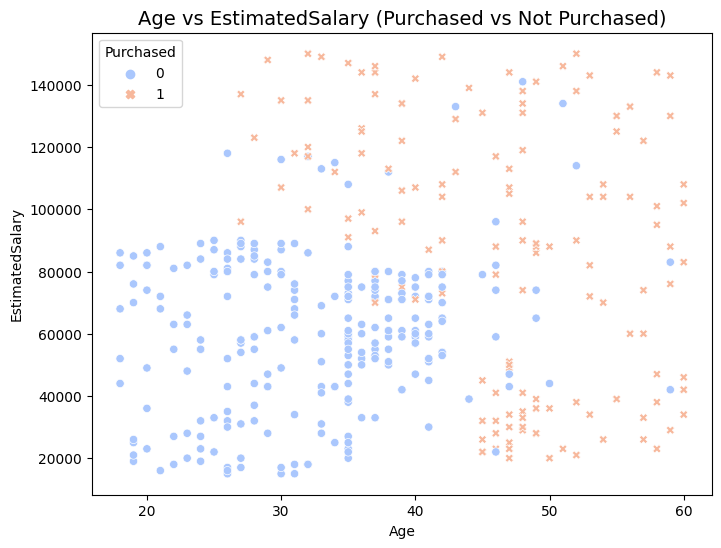

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', style='Purchased')

plt.title('Age vs EstimatedSalary (Purchased vs Not Purchased)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend(title='Purchased')
plt.show()

In [11]:
df=pd.get_dummies(df, columns=["Gender"], drop_first=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [12]:
X = df[['Age','EstimatedSalary','Gender_Male']]
y = df['Purchased']
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**GridSearchCV**

GridSearchCV is a tool from the scikit-learn library that helps in optimizing the hyperparameters of a model by performing an exhaustive search over a specified parameter grid. It uses cross-validation to evaluate the performance of different parameter combinations. This systematic approach ensures that we choose the best possible set of hyperparameters for our model, improving its performance.

Cross-validation is incorporated to evaluate the performance of each parameter combination on different subsets of the data, improving the model’s generalizability and reducing the likelihood of overfitting.

**Key Hyperparameters**

* C: Regularization parameter that controls the trade-off between achieving a low error on the training set and maintaining a simpler model. Higher values of C can lead to overfitting, while lower values can lead to underfitting.
* gamma: Kernel coefficient, which controls the influence of a single training example. A smaller gamma leads to smoother decision boundaries, while a larger gamma creates a more complex decision boundary.
* kernel: Defines the kernel type to be used in the algorithm. In this project, we experimented with the linear, rbf, and polynomial kernels.

In [24]:
model=SVC()


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


print("Best Params:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.93
